In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
fish = pd.read_csv('Fish.csv')
fish

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340
...,...,...,...,...,...,...,...
154,Smelt,12.2,11.5,12.2,13.4,2.0904,1.3936
155,Smelt,13.4,11.7,12.4,13.5,2.4300,1.2690
156,Smelt,12.2,12.1,13.0,13.8,2.2770,1.2558
157,Smelt,19.7,13.2,14.3,15.2,2.8728,2.0672


In [3]:
from sklearn.preprocessing import LabelEncoder
lab_enc = LabelEncoder()
fish['Species'] = lab_enc.fit_transform(fish['Species'])

# outlier removel

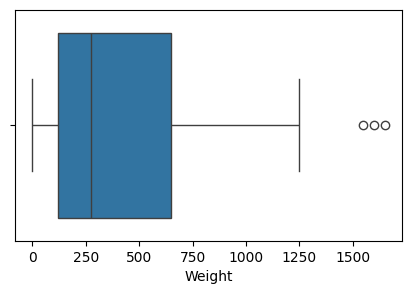

In [7]:
plt.figure(figsize = (5,3))
sns.boxplot(data = fish,x = 'Weight')
plt.show()

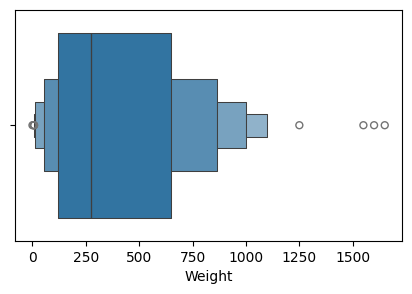

In [8]:
plt.figure(figsize = (5,3))
sns.boxenplot(data = fish,x = 'Weight')
plt.show()

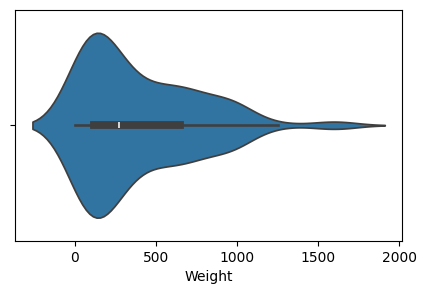

In [9]:
plt.figure(figsize = (5,3))
sns.violinplot(data = fish,x = 'Weight')
plt.show()

In [5]:
Q1 = fish['Weight'].quantile(0.25)
Q3 = fish['Weight'].quantile(0.75)

In [6]:
print(Q1,Q3)

120.0 650.0


In [10]:
# Calculate IQR (Inter Quartile Range)

IQR = Q3 - Q1
print(IQR)

530.0


In [11]:
lower = Q1 - 1.5*IQR
upper = Q3 + 1.5*IQR

In [15]:
lower

np.float64(-675.0)

In [13]:
upper

np.float64(1445.0)

In [19]:
upper_index = np.where(fish['Weight'] >= upper)[0]
lower_index = np.where(fish['Weight'] <= lower)[0]

In [20]:
fish.drop(index=upper_index,inplace = True)
fish.drop(index=lower_index,inplace = True)

In [21]:
fish.shape

(156, 7)

In [22]:
X = fish.drop("Weight",axis = 1)
y = fish['Weight']

In [23]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures()
poly_feature = poly.fit_transform(X)

In [24]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(poly_feature,
                                                 y,
                                                 test_size = 0.3)

In [35]:
print(X_train[0])

[1.0000000e+00 3.0000000e+00 4.4800000e+01 4.8000000e+01 5.1200000e+01
 7.6800000e+00 5.3760000e+00 9.0000000e+00 1.3440000e+02 1.4400000e+02
 1.5360000e+02 2.3040000e+01 1.6128000e+01 2.0070400e+03 2.1504000e+03
 2.2937600e+03 3.4406400e+02 2.4084480e+02 2.3040000e+03 2.4576000e+03
 3.6864000e+02 2.5804800e+02 2.6214400e+03 3.9321600e+02 2.7525120e+02
 5.8982400e+01 4.1287680e+01 2.8901376e+01]


In [39]:
print(y_train)

139     770.0
9       500.0
91      130.0
123    1100.0
101     218.0
        ...  
26      720.0
92      150.0
4       430.0
130     300.0
27      714.0
Name: Weight, Length: 109, dtype: float64


In [25]:
from sklearn.linear_model import LinearRegression
lin_reg2 = LinearRegression()
lin_reg2.fit(X_train,y_train)

LinearRegression()

In [26]:
y_pred_poly = lin_reg2.predict(X_test)
y_pred_poly[:10]

array([651.45484899, 580.2415251 , 598.73602142,  -1.33045247,
        37.11276977, 297.31633473, 870.59064859, 141.38679762,
       131.28708346, 497.04724721])

In [30]:
from sklearn.metrics import r2_score,root_mean_squared_error
print("R2 Score",r2_score(y_test,y_pred_poly))
print("RootMeanSquaredError",root_mean_squared_error(y_test,y_pred_poly))

R2 Score 0.9721034004490114
RootMeanSquaredError 57.39373080443546


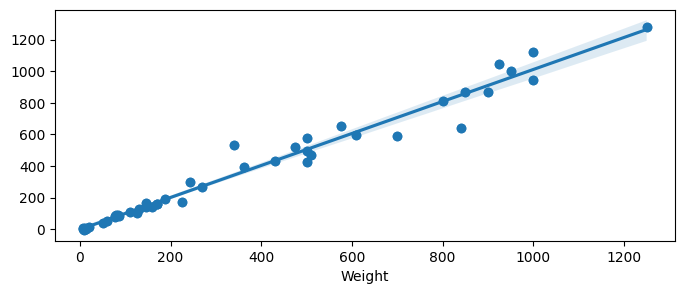

In [31]:
plt.figure(figsize=(8,3))
plt.scatter(y_test,y_pred_poly)
#plt.plot(y_test,y_pred_lin1)
sns.regplot(x = y_test,y = y_pred_poly)
plt.show()